TASK 1

In [14]:
import pandas as pd

# Load the CSV files
umsatz_df = pd.read_csv('umsatzdaten_gekuerzt.csv')
kiwo_df = pd.read_csv('kiwo.csv')
wetter_df = pd.read_csv('wetter.csv')

# Display the first few rows and column names to understand the structure
umsatz_df.head(), kiwo_df.head(), wetter_df.head()


(        id       Datum  Warengruppe      Umsatz
 0  1307011  2013-07-01            1  148.828353
 1  1307021  2013-07-02            1  159.793757
 2  1307031  2013-07-03            1  111.885594
 3  1307041  2013-07-04            1  168.864941
 4  1307051  2013-07-05            1  171.280754,
         Datum  KielerWoche
 0  2012-06-16            1
 1  2012-06-17            1
 2  2012-06-18            1
 3  2012-06-19            1
 4  2012-06-20            1,
         Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
 0  2012-01-01         8.0      9.8250                   14        58.0
 1  2012-01-02         7.0      7.4375                   12         NaN
 2  2012-01-03         8.0      5.5375                   18        63.0
 3  2012-01-04         4.0      5.6875                   19        80.0
 4  2012-01-05         6.0      5.3000                   23        80.0)

In [15]:
# Convert Datum columns to datetime format
umsatz_df['Datum'] = pd.to_datetime(umsatz_df['Datum'])
kiwo_df['Datum'] = pd.to_datetime(kiwo_df['Datum'])
wetter_df['Datum'] = pd.to_datetime(wetter_df['Datum'])

# Merge umsatz_df with kiwo_df
merged_df = pd.merge(umsatz_df, kiwo_df, on='Datum', how='left')

# Merge the result with wetter_df
merged_df = pd.merge(merged_df, wetter_df, on='Datum', how='left')

# Display the first few rows of the final merged DataFrame
merged_df.head()


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN


TASK 2

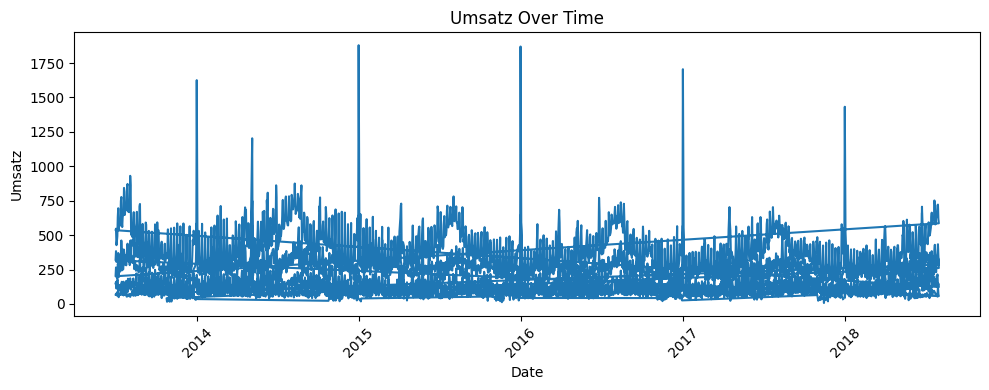

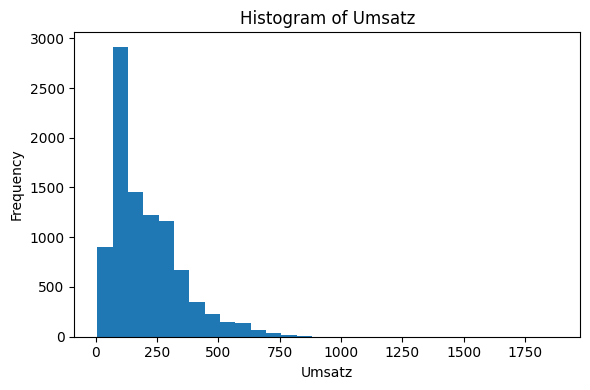

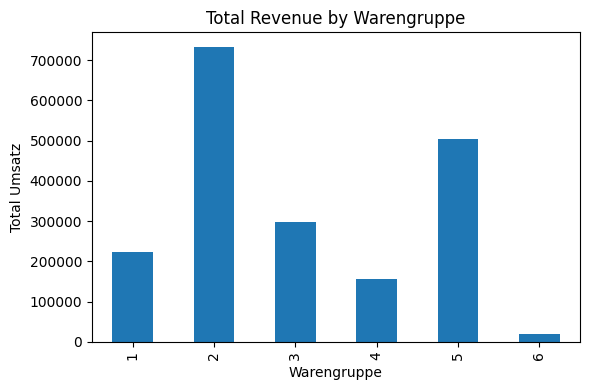

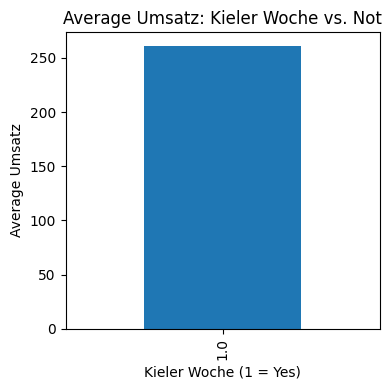

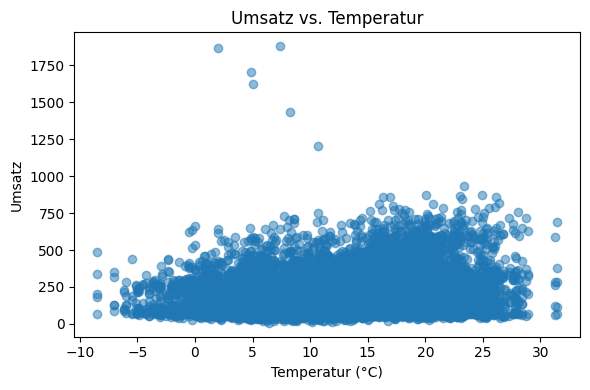

In [ ]:
import matplotlib.pyplot as plt


# 1. Umsatz over time
plt.figure(figsize=(10, 4))
plt.plot(merged_df['Datum'], merged_df['Umsatz'])
plt.title('Umsatz Over Time')
plt.xlabel('Date')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram of Umsatz
plt.figure(figsize=(6, 4))
plt.hist(merged_df['Umsatz'].dropna(), bins=30)
plt.title('Histogram of Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Revenue by Warengruppe
group_revenue = merged_df.groupby('Warengruppe')['Umsatz'].sum().sort_index()

plt.figure(figsize=(6, 4))
group_revenue.plot(kind='bar')
plt.title('Total Revenue by Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Total Umsatz')
plt.tight_layout()
plt.show()

# 4. Kieler Woche comparison
kw_revenue = merged_df.groupby('KielerWoche')['Umsatz'].mean()

plt.figure(figsize=(4, 4))
kw_revenue.plot(kind='bar')
plt.title('Average Umsatz: Kieler Woche vs. Not')
plt.xlabel('Kieler Woche (1 = Yes)')
plt.ylabel('Average Umsatz')
plt.tight_layout()
plt.show()

# 5. Umsatz vs. Temperatur scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], alpha=0.5)
plt.title('Umsatz vs. Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.tight_layout()
plt.show()


In [16]:
# Descriptive statistics for numerical columns
desc_stats = merged_df.describe()

desc_stats

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,9.334000e+03,9334,9334.000000,9334.000000,223.0,9264.000000,9318.000000,9318.000000,7009.000000
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,1.0,4.720747,12.028483,10.974780,36.900128
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,1.0,0.000000,-8.475000,3.000000,0.000000
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,1.0,3.000000,6.237500,8.000000,10.000000
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,1.0,7.000000,17.962500,13.000000,61.000000
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,1.0,8.000000,31.437500,35.000000,95.000000
std,1.512503e+05,NaN,1.489002,144.545189,0.0,2.646273,7.232829,4.131974,27.095884
